In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from HBM.CRP import CRP, StickyCRP
from HBM.structures import Feature, Category
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm.auto import tqdm

In [2]:
with open("../data/zoo.csv", "r") as f:
    reader = csv.reader(f)
    data=[]
    for row in reader:
        data.append(row)

In [3]:
feature_labels = data[0][1:]
names = [d[0] for d in data[1:]]
features = [np.array(d[1:]).astype(np.int64) for d in data[1:]]

In [4]:
def run(clusters, feature_labels):
    n_clusters = len(clusters)
    fig, axs = plt.subplots(1, n_clusters, figsize=(3.5 * n_clusters, 6), sharey=True)
    for i, cluster in enumerate(model.clusters):
        values = np.array([item.values for item in cluster.items])
        labels = [item.label for item in cluster.items]
        axs[i].imshow(
            values.T, 
            aspect='equal', 
            vmin=0, vmax=1, 
            cmap='binary'
        )
        axs[i].set_xticks(np.arange(len(labels)))
        axs[i].set_xticklabels(labels, rotation=90, fontsize=6)
        axs[i].set_title(f"Cluster {i}\n({cluster.n} data)")
        axs[i].set_yticks([])
    
    axs[0].set_yticks(np.arange(values.shape[1]))
    axs[0].set_yticklabels(feature_labels)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

0it [00:00, ?it/s]

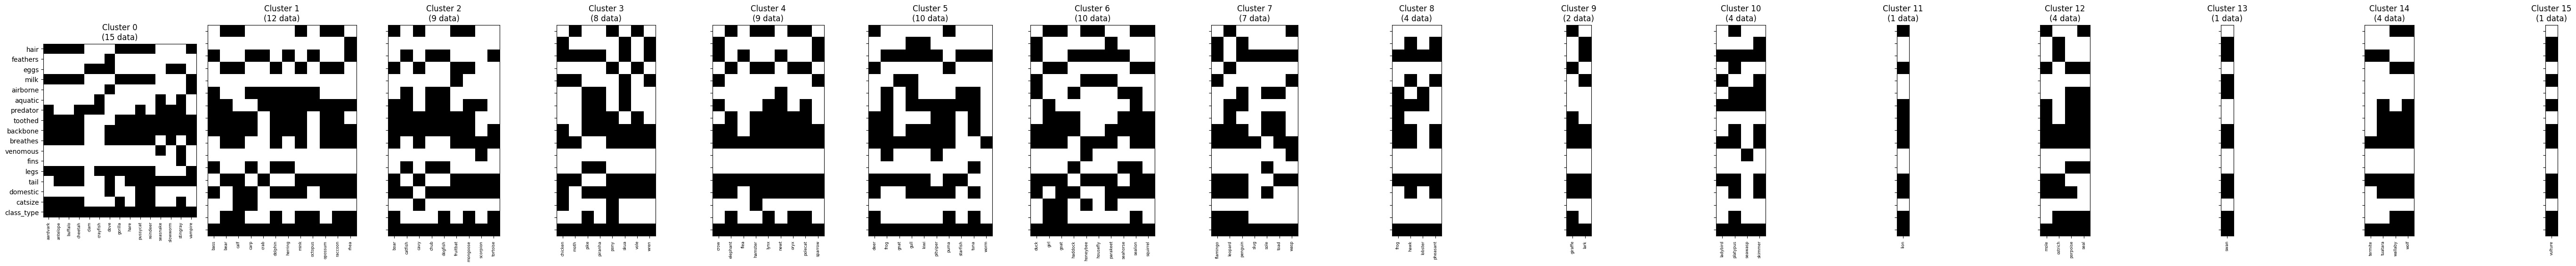

In [5]:
model = CRP(alpha=1, delta=1, strict=False)
for name, feature in tqdm(zip(names, features)):
    model.add(Feature(name, feature))
run(model.clusters, feature_labels)

0it [00:00, ?it/s]

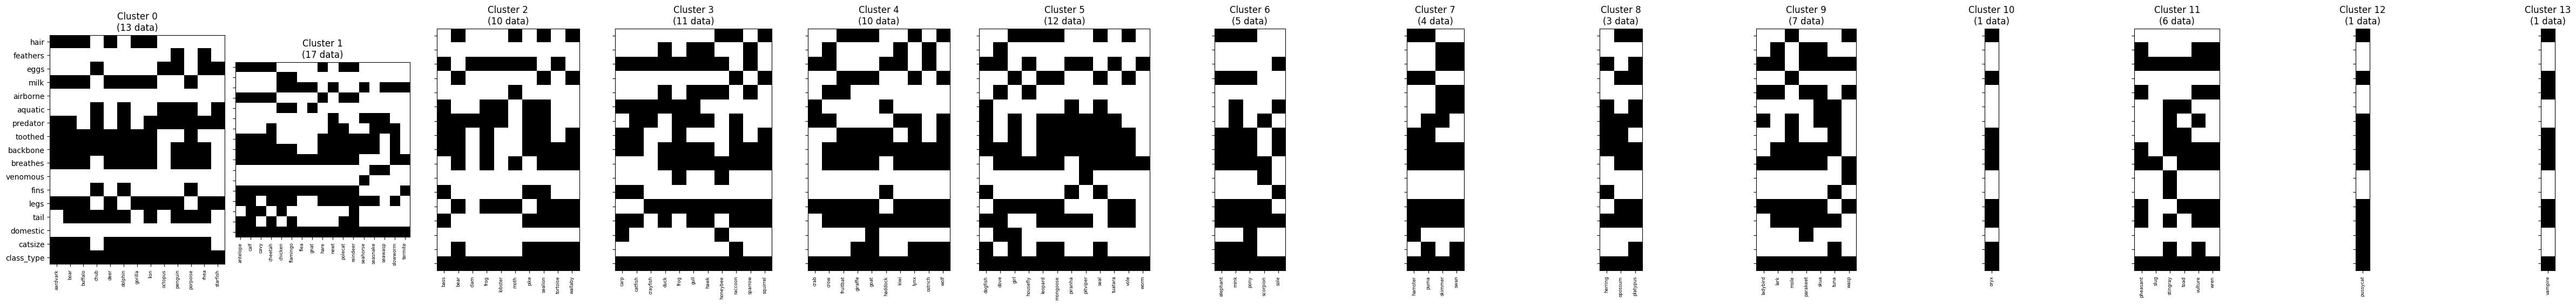

In [6]:
model = StickyCRP(alpha=1, delta=1, strict=False, stickiness=1.0)
for _, (name, feature) in tqdm(enumerate(zip(names, features))):
    model.add(Feature(name, feature))
run(model.clusters, feature_labels)

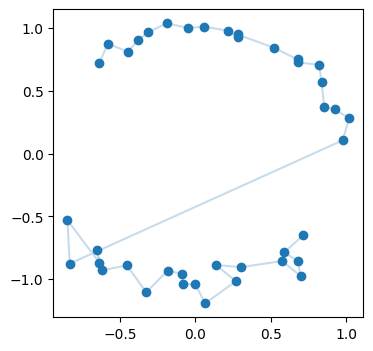

In [7]:
np.random.seed(0)  # for consistency, set the seed

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

A = rotation_matrix( -np.pi/2 * 0.075)
x_train = [ np.array([[-1, 1]]).T / np.sqrt(2)]

for _ in range(19):
    x_train.append(np.matmul(A, x_train[-1]))

A = rotation_matrix( np.pi/2 * 0.055)
x_train.append(np.array([[-1, -1]]).T / np.sqrt(2))
for _ in range(19):
    x_train.append(np.matmul(A, x_train[-1]))

x_train = np.concatenate(x_train, axis=1).T

# add observation noise
x_train[:20, :] += np.random.randn(20, 2) * 0.04
x_train[20:, :] += np.random.randn(20, 2) * 0.12

plt.figure(figsize=(4,4))
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.plot(x_train[:, 0], x_train[:, 1], alpha=0.25)

# label of the true identies
y = np.concatenate([np.zeros(20), np.ones(20)])

In [43]:
model = CRP(alpha=1, delta=1, strict=False)
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))

0it [00:00, ?it/s]

0, [-0.63654469  0.72311307]
1, [-0.57994443  0.87495266]
2, [-0.44779625  0.81354905]
3, [-0.3806562   0.90208889]
4, [-0.31314575  0.96748046]
5, [-0.18932858  1.03895622]
6, [-0.04801759  1.00178433]
7, [0.05701435 1.01257601]
8, [0.21619763 0.97948201]
9, [0.28396316 0.92829141]
10, [0.28056384 0.95002428]
11, [0.52319869 0.84280941]
12, [0.67857544 0.75084237]
13, [0.68063109 0.72683516]
14, [0.82171713 0.7082224 ]
15, [0.83766751 0.57069673]
16, [0.85549509 0.37475864]
17, [0.92427485 0.35237102]
18, [1.02158155 0.28154056]
19, [0.97757538 0.10544529]
20, [-0.83293314 -0.87750893]
21, [-0.84820829 -0.53139017]
22, [-0.63616351 -0.87071863]
23, [-0.65260098 -0.7714146 ]
24, [-0.61944703 -0.93035589]
25, [-0.45357304 -0.89176304]
26, [-0.32516967 -1.10623328]
27, [-0.18304262 -0.9323288 ]
28, [-0.08612625 -0.95926534]
29, [-0.08397255 -1.0434981 ]
30, [-0.00223616 -1.04006371]
31, [ 0.06660929 -1.19358317]
32, [ 0.26998102 -1.01679687]
33, [ 0.13571409 -0.88797829]
34, [ 0.30263855

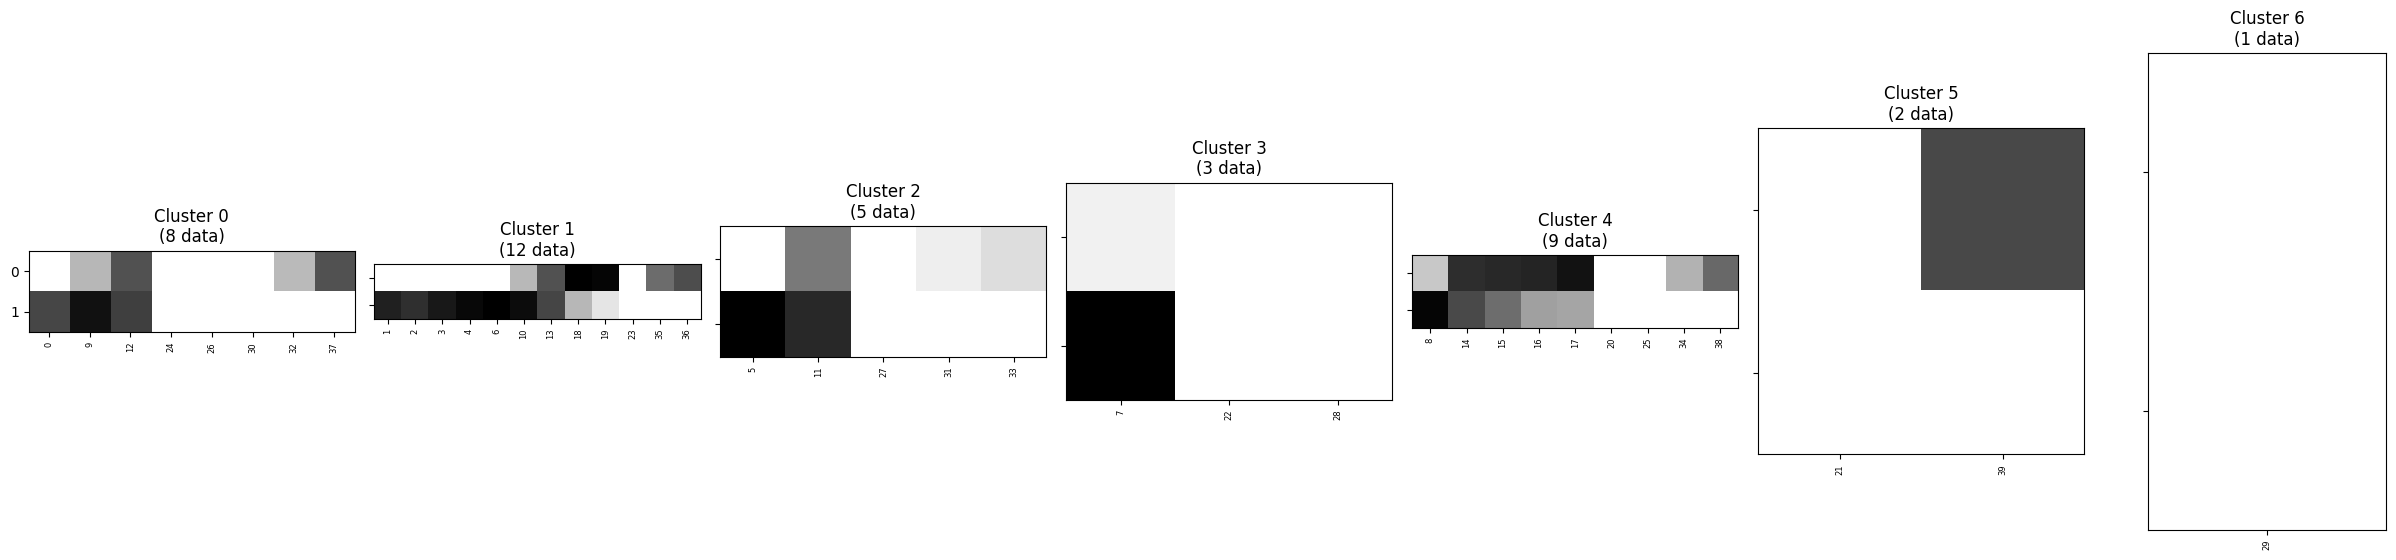

In [44]:
run(model.clusters, [0, 1])

In [56]:
model = StickyCRP(alpha=1, delta=1, strict=False, stickiness=100.0)
for name, feature in tqdm(zip(np.arange(40), x_train)):
    model.add(Feature(name, feature))

0it [00:00, ?it/s]

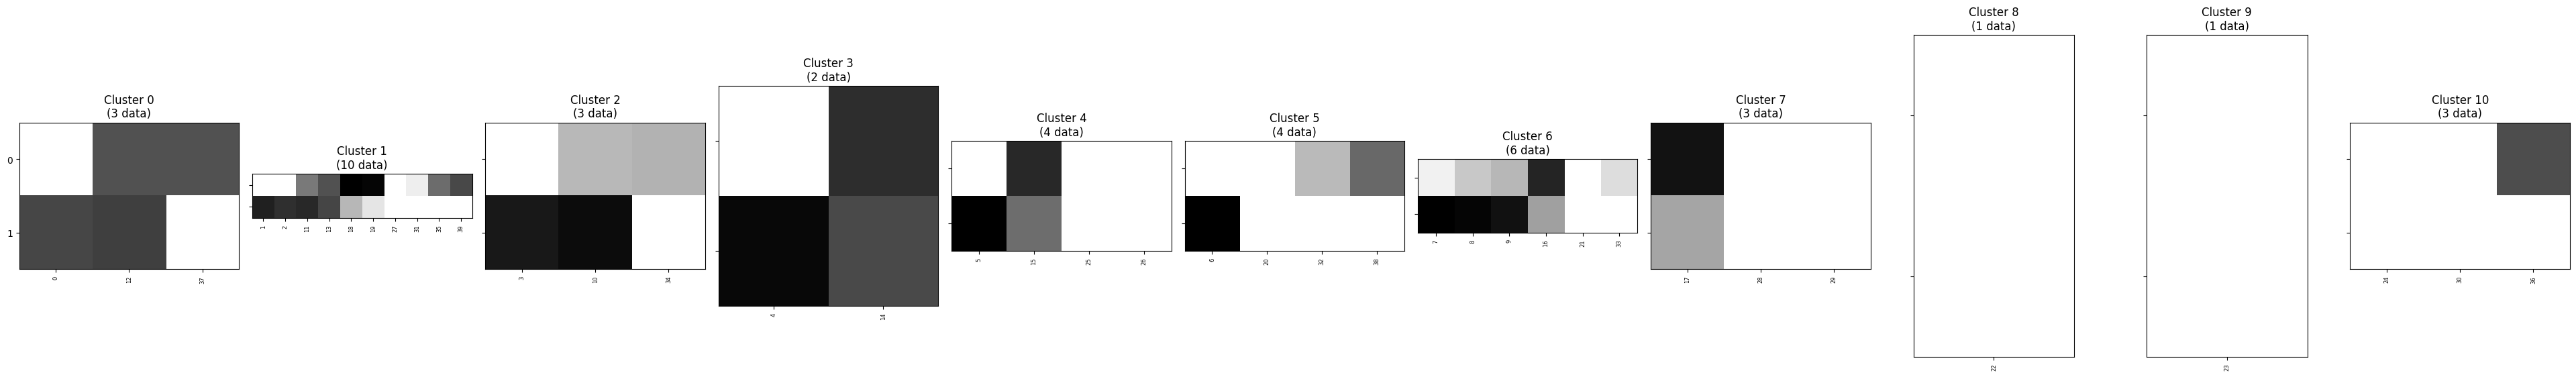

In [57]:
run(model.clusters, [0, 1])

In [73]:
color = plt.get_cmap('viridis').colors
print(len(color))
print(len(model.clusters))
step = int(len(color) / len(model.clusters))

256
11


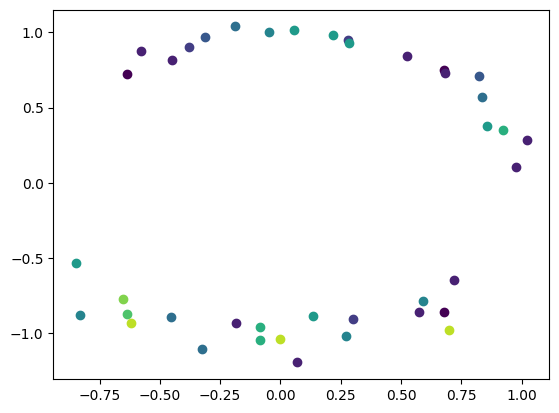

In [75]:
for i, cluster in enumerate(model.clusters):
    datapoints = np.array([item.values for item in cluster.items])
    datasequences = [item.label for item in cluster.items]
    for x, y in datapoints:
        plt.plot(x, y, '-o', color=color[i*step])
plt.show()

/var/folders/49/s55pfnr13kndqgtbjgm0rmbr0000gn/T/ipykernel_19406/763481762.py:54: FutureWarning: Some algorithms will automatically enumerate the discrete latent site z_0 of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, data=data_jax, K=10, kappa=10.0)
/var/folders/49/s55pfnr13kndqgtbjgm0rmbr0000gn/T/ipykernel_19406/763481762.py:54: FutureWarning: Some algorithms will automatically enumerate the discrete latent site z_Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)> of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, data=data_jax, K=10, kappa=10.0)


KeyError: 'z_1'